#### 1st meeting, 25th, Jan, 2016

### 1. signals with different frequencies and phases

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
set_printoptions( precision = 6, suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
Signals = np.zeros( (3,256))

f1 = 4  #low frequency
f2 = 10 #high frequency
t = np.linspace(0,1,256)
Signals[0] = sin(2*pi*f1*t) + 0.01*randn(256)
Signals[1] = 4*sin(2*pi*f2*t) + 0.01*randn(256)
Signals[-1] = 4*sin(2*pi*f2*(t-0.025)) + 0.01*randn(256)

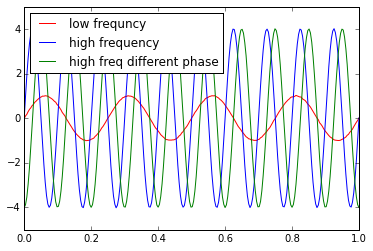

In [3]:
plt.plot(t, Signals[0], 'r', t, Signals[1], 'b', t, Signals[-1], 'g')
plt.legend(['low frequncy', 'high frequency', 'high freq different phase'], loc='upper left')
plt.show()

In [9]:
def power(data):
    ps = 20* np.log10(np.abs(np.fft.rfft(data)))
    time_step = 1 / data.size
    t = np.arange(0,1,time_step)
    f = np.linspace(0, data.size/2, len(ps))
    return f, ps

In [15]:
f = power(Signals[0])[0] #frequencies

pow_low_freq = power(Signals[0])[1]
pow_high_freq = power(Signals[1])[1]
pow_high_freq_2 = power(Signals[2])[1] #different phases

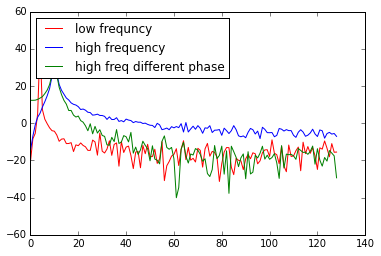

In [16]:
plt.plot(f, pow_low_freq, 'r', f, pow_high_freq, 'b', f, pow_high_freq_2, 'g')
plt.legend(['low frequncy', 'high frequency', 'high freq different phase'], loc='upper left')
plt.show()

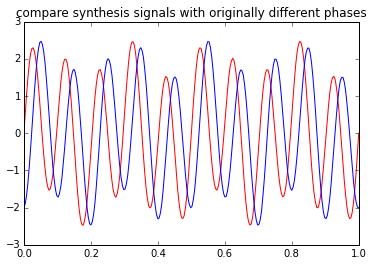

In [32]:
compose_1 = 1/2* Signals[0]  + 1/2*Signals[1] 
compose_2 = 1/2* Signals[0]  + 1/2*Signals[-1] 
plt.plot(t, compose_1, 'r', t, compose_2, 'b')
plt.title('compare synthesis signals with originally different phases')
plt.show()

#### Based on plots drawn above, we understand the difficulty of phase reconstruction

$$y = Af(t) + Bg(t)$$
$$y = Af(t+k) + Bg(t)$$

#### We cannot get the phase parameter *k* from its power spectrum

<h3>

$$
\begin{align}
\mathscr{F}(p)\mathscr{F}(q) &= \mathscr{F}(p*q) \\
(p*q)(t) &= \int_{-\infty}^{\infty} p(u)q(t-u)du
\end{align}
$$

<h4>

where x has probability density function (pdf) of p and y has pdf of q

$\frac{x_1+ \cdots + x_n}{n}$ has pdf of $\frac{p_1 * \cdots * p_n}{n}$

and Characteristic of $\frac{x_1+ \cdots + x_n}{n}$ is $$\frac{\hat p_1(w) * \cdots * \hat p_n(w)}{n}$$

This justifies why we could take the product of fourier transform value. 

<span style="background-color: yellow">
I am not sure if I fully understand this part; why pdf of sum of independent variable is the product of their fourier transform


### Understanding what is fourier fransform

$$
F_4 = 
\begin{array}{c}
\begin{matrix}
\mathsf{e_1} & \mathsf{e_2}  & \mathsf{e_3} & \mathsf{e_4}
\end{matrix} \\
\left[\ \begin{matrix}
\frac{1}{2} &  \frac{1}{2} &  \frac{1}{2} & \frac{1}{2} \\ 
\frac{1}{2} &  \frac{1}{2} &  \frac{-1}{2} & \frac{-1}{2} \\ 
\frac{1}{2} &  \frac{-1}{2} &  \frac{1}{2} & \frac{-1}{2} \\ 
\frac{1}{2} &  \frac{-1}{2} &  \frac{-1}{2} & \frac{1}{2} \\ 
\frac{1}{2} &  \frac{1}{2} &  \frac{1}{2} & \frac{1}{2} \\ 
\frac{1}{2} &  \frac{1}{2} &  \frac{-1}{2} & \frac{-1}{2} \\ 
\frac{1}{2} &  \frac{-1}{2} &  \frac{1}{2} & \frac{-1}{2} \\ 
\frac{1}{2} &  \frac{-1}{2} &  \frac{-1}{2} & \frac{1}{2}
\end{matrix}\ \right]
\end{array}
$$

$\mathbb{R^4} \Rightarrow \mathscr{F}$ Basis, $\mathsf{e_1}, \mathsf{e_2}, \mathsf{e_3} \ and \ \mathsf{e_4}$

- Observing that each column is linear independent from others. $\mathsf{e_1}$ has a period of 1, $\mathsf{e_3}$ has a period of 2, $\mathsf{e_2}$ and $\mathsf{e_4}$ have a period of 4. 
- It is like mapping current series of data into orthonormal basis
- $F_4F_4^T = I = F_4^TF_4$, $F_4$ is unitary matrix


Suppose $$x = \left( x_1 \ | \  x_2 \ | \ x_3 \ | \  x_4 \right)$$
Then 
$$
\begin{align}
x_1 &= <x_1e_1>e_1 + <x_1e_2>e_2 + <x_1e_3>e_3 + <x_1e_4>e_4 \\
\vdots \\
x_4 &= <x_4e_1>e_1 + <x_4e_2>e_2 + <x_4e_3>e_3 + <x_4e_4>e_4 
\end{align}
$$

$$
\begin{align}
x &= e_1e_1^Tx + e_2e_2^Tx + e_3e_3^Tx + e_4e_4^Tx  \\
  &= [e_1|e_2|e_3|e_4]
\left[\ \begin{matrix}
e_1^Tx \\
e_2^Tx \\
e_3^Tx \\
e_4^Tx
\end{matrix} \right]
\end{align}
$$

<span style="background-color: yellow">
This part is also a little bit confusing to me. What I have learnt here is the matrix representation of power spectrum

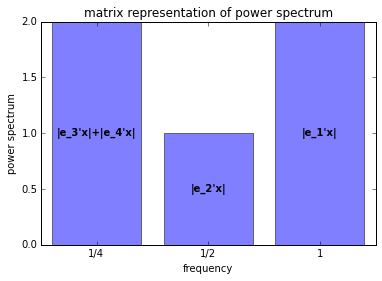

In [92]:
xlab = ('1/4', '1/2', '1')
x_pos = np.arange(len(xlab))
value = [2,1,2]
label = array(['|e_3\'x|+|e_4\'x|', '|e_2\'x|', '|e_1\'x|'])

# dict = {0: r'$|\e_3^Tx|+|\e_4^Tx|$', 1: 7, 2: 'First'}
bars = plt.bar(x_pos, value, align='center', alpha=0.5)
plt.xticks(x_pos, xlab)
plt.ylabel('power spectrum')
plt.xlabel('frequency')
plt.title('matrix representation of power spectrum')


i = 0
for bar in bars:
    height = int(bar.get_height())
    yloc = height/2.0
    xloc = bar.get_x() + (bar.get_width() / 2.0)
    text = label[i]
    plt.text(xloc, yloc,text, horizontalalignment='center', verticalalignment='center', weight='bold')
    i = i+1
plt.show()

Now we have $\underset{32 \times 256}{X}$, 32 signals and 256 time sieres mark. 

$$
XF = 
\left[\ \begin{matrix}
- & x^{T}_{1} & -\\
    - & x^{T}_{2} & -\\
    & \vdots & \\
    - & x^{T}_{n} & -
\end{matrix}\ \right]
\left[\ \begin{matrix}
e_1 \ | \ e_2 \ | \ e_3 \ | \ e_4 \ | \cdots \ | \ e_{256}\end{matrix}\ \right]
= \left[\ \begin{matrix}
x_1^Te_1 & x_1^Te_2 & \cdots \\
x_2^Te_1 &  & \\
\vdots&  & \\
x_{32}^Te_1 & &
\end{matrix}\ \right]
$$

<h3>

Then each row of XF is fourier transform of vector $x_i$. We just need to find the inverse matrix of F so that $X = XFF^{-1}$ by matrix associative property